## Missing Data - stacks batch 4


I'm STILL getting a ton of missing loci in my Alaska samples. I have already made sure that the sequences are trimmed to the same length. 


When I run filtering steps WITHOUT using Marine's genotype verification method, I'm removing about 1/3 of my loci with a **50%** missing data cutoff. And I'm removing 43 individuals with a **50%** missing data cutoff. I end up with 2,454 loci. 
<br>
When I run filtering steps WITH Marine's genotype verification method, I can use a **50%** missing data cutoff and remove only 1/6 of my loci, and can use a **30%** missing data cutoff for individuals, which is what I used on my Korean populations. I end up with 3,909 loci. 


### Missing Data v. Location of SNPs 

I want to see the location of the SNPs of these loci in the  sequence. So I'm going to plot % missing data by SNP location in sequence. 

In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [2]:
cd ../stacks_b4_wgenome/

/mnt/hgfs/PCod-Compare-repo/stacks_b4_wgenome


In [3]:
## GET A LIST OF LOCI WITH MISSING GENOTYPES IN ALL / MOST OF ALASKA SAMPLES ##
infile = open("batch_4_MB_filteredMAF.txt", "r")
outfile = open("../analyses/batch_4_MB_missingdata.txt", "w")
infile.readline()
bad_loci = {}
for line in infile:
    linelist = line.strip().split(",")
    locus = linelist[0]
    genotypes = linelist[1:]
    n_missing = int(genotypes.count("0000")) + 0.00000000000001
    p_missing = float(n_missing)/float(len(genotypes))
    if p_missing > 0.30:
        bad_loci[locus] = p_missing
        outfile.write(locus + "\t" + str(p_missing) + "\n")
infile.close()
outfile.close()

In [4]:
## FIND THE LOCATION OF THE SNPS USED AT THAT LOCUS ##
orig_loci_list = bad_loci.keys()
infile = open("batch_4_genepop.txt", "r")
infile.readline() #header
loci_list = infile.readline().strip().split(",")
plot_loci = []
plot_snp_pos = []
plot_missing_data = []
for i in loci_list:
    locus = i.split("_")[0]
    snp = i.split("_")[1]
    if locus in orig_loci_list:
        plot_loci.append(locus)
        plot_snp_pos.append(snp)
        plot_missing_data.append(bad_loci[locus])
infile.close()

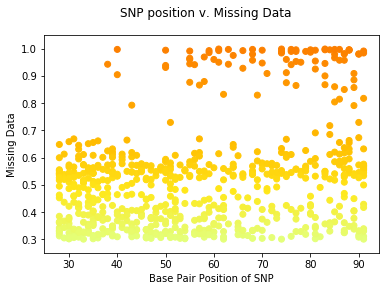

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(plot_snp_pos, plot_missing_data, c = plot_missing_data, cmap = "Wistia")
plt.suptitle("SNP position v. Missing Data")
plt.xlabel("Base Pair Position of SNP")
plt.ylabel("Missing Data")
plt.show()

In [6]:
plt.close()

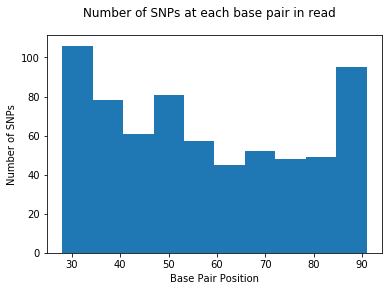

In [7]:
plt.hist([float(i) for i in plot_snp_pos])
plt.suptitle("Number of SNPs at each base pair in read")
plt.xlabel("Base Pair Position")
plt.ylabel("Number of SNPs")
plt.show()

In [8]:
plt.close()



<br>
<br>

### Why is there more missing data in the stacks v. Marine's method of calling genotypes?

I think that the difference in missing data between Marine's and the stacks calling of genotypes has a lot to do with the stacks' likelihood function. 


If the problem with the Alaskan samples is that they have a low stack depth at each locus, then Marine's script will call a genotype whereas the stack's likelihood function might not (I think). 
If the problem with the Alaskan samples is that they have variation at the locus that is NOT being captured in the catalog, they should be missing genotypes in both scripts (I think). 

To explore these two questions, I want to look at a few things: 

### 1) When the data is missing in the stacks genotypes, what is Marine's script calling that locus?

Maybe stacks isn't calling that genotype because the likelihood function can't figure out if it is supposed to be a heterozygote or homozygote. This MIGHT 
I took two individuals and sampled genotypes from the first 446 loci for comparison. In a Korean individual, there was actually more missing data in Marine's script. In the Alaskan individual, there were 170 missing genotypes in the stacks batch v. 145 after Marine's script. the majority of loci that were missing in stacks and called in Marine's script were homozygotes. 


In [9]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/stacks_b4_wgenome'

In [10]:
cd analyses

[Errno 2] No such file or directory: 'analyses'
/mnt/hgfs/PCod-Compare-repo/stacks_b4_wgenome


In [11]:
cd ../analyses

/mnt/hgfs/PCod-Compare-repo/analyses


In [12]:
cd batch_4_missing_data

/mnt/hgfs/PCod-Compare-repo/analyses/batch_4_missing_data


In [14]:
infile = open("batch_4_missing_genotypes_unfiltered_comparison_all_loci.txt", "r")
loci = open("batch_4_missing_genotypes_comparison_loci_list.txt", "r")
outfile = open("batch_4_missing_genotypes_unfiltered_comparison_filtered_loci.txt", "w")

loci_to_keep = []
loci.readline()
for line in loci:
    loci_to_keep.append(line.strip())
loci.close()

header = infile.readline()
outfile.write(header)
for line in infile:
    locus = line.strip().split()[0]
    if locus in loci_to_keep:
        outfile.write(line)
infile.close()
outfile.close()


<br>

### 2) What is the stack depth at loci that are missing? 

To answer this question, I need a script that will: 
1. look at the final genepop file and extract loci that missing across alaskan individuals
2. take a subset of individuals from alaskan populations. go through the list of loci from (1) to identify which loci are missing in those individuals. 
3. go into the individual snps files and look at read depth


In [16]:
## re-create genepop file that has been filtered for MAF only ##

In [17]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/analyses/batch_4_missing_data'

In [18]:
cd ../../scripts/PostStacksFilter_rSNP

/mnt/hgfs/PCod-Compare-repo/scripts/PostStacksFilter_rSNP


In [20]:
!python filter_for_MAF_from_parsedINF.py -h

usage: filter_for_MAF_from_parsedINF.py [-h] [-inf INFINPUT]
                                        [-mat MATRIXINPUT] [-og OUTPUT_GOOD]
                                        [-ob OUTPUT_BAD]
                                        [-ofg OUTPUTFREQS_GOOD]
                                        [-ofb OUTPUTFREQS_BAD]
                                        [-p PATH_STACKS] [-a ALLELES]
                                        [-b BATCH]

filter for MAF using parsed .INF genepop file.

optional arguments:
  -h, --help            show this help message and exit
  -inf INFINPUT, --INFinput INFINPUT
                        parsed .INF file
  -mat MATRIXINPUT, --MATRIXinput MATRIXINPUT
                        half filtered matrix file that was used to make
                        genepop file
  -og OUTPUT_GOOD, --output_good OUTPUT_GOOD
                        output file, good loci
  -ob OUTPUT_BAD, --output_bad OUTPUT_BAD
                        output file, bad loci
  -ofg OUTPUTFREQS_

In [21]:
!python filter_for_MAF_from_parsedINF.py \
-inf batch_4_parseINF.txt \
-mat batch_4_matrix_TRANSPOSED.txt \
-og batch_4_filteredMAF.txt \
-ob batch_4_filteredMAF_bad.txt \
-ofg batch_4_filteredMAF_goodFreqs.txt \
-ofb batch_4_filteredMAF_badFreqs.txt \
-p ../../stacks_b4_wgenome \
-a 2 \
-b 4

3999  loci written to filtered output file.
Filtered out  15217  loci.


In [22]:
cd ../../

/mnt/hgfs/PCod-Compare-repo


*Note - added in "region code" manually in excel. second row in file; `0` for Korean cod and `1` for Alaskan cod*

In [29]:
## extract loci missing across alaskan individuals ##
infile = open("stacks_b4_wgenome/batch_4_filteredMAF_regioncode.txt", "r")
outfile = open("analyses/batch_4_missing_data/batch_4_loci_missing_AK_individs_only.txt", "w")
outfile2 = open("analyses/batch_4_missing_data/batch_4_loci_NOT_missing_AK_individs_only.txt", "w")
freqfile = open("analyses/batch_4_missing_data/batch_4_loci_missing_data_freqs_by_region.txt", "w")


header = infile.readline()
outfile.write(header)
outfile2.write(header)
regions = infile.readline()
regions_list = regions.split()[1:]
index_end = len([i for i in regions_list if i == "0"]) - 1
n_korean = len([i for i in regions_list if i == "0"])
n_alaskan = len([i for i in regions_list if i == "1"])

freqfile.write("locus\tp_missing_KOR\tp_missing_AK\n")

for line in infile:
    linelist = line.strip().split()
    locus = linelist[0]
    i = 0
    korean_missing = 0
    alaskan_missing = 0
    for genotype in linelist[1:]:
        if i < index_end or i == index_end:
            if genotype == "0":
                korean_missing += 1
            i += 1
        elif i > index_end:
            if genotype == "0":
                alaskan_missing += 1
            i += 1
    korean_p_missing = float(korean_missing) / float(n_korean)
    alaskan_p_missing = float(alaskan_missing) / float(n_alaskan)
    freqfile.write(locus + "\t" + str(korean_p_missing) + "\t" + str(alaskan_p_missing) + "\n")
    if korean_p_missing < 0.20 and alaskan_p_missing > 0.95:
        outfile.write(line)
    else:
        outfile2.write(line)
infile.close()
outfile.close()
outfile2.close()
freqfile.close()

In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [2]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [3]:
## DO THE LOCI EXIST IN THE ALASKAN INDIVIDUALS' .MATCHES FILES ##

# get a list of the Alaskan samples
popmap = open("scripts/PopMap_combo_b4.txt", "r")

sampleList = []

line = popmap.readline()
while not line.startswith("KOD"):
    line = popmap.readline()
while line:
    sample = line.strip().split()[0]
    sampleList.append(sample)
    line = popmap.readline()
popmap.close()

# get a list of loci to look for
infile = open("analyses/batch_4_missing_data/batch_4_loci_missing_AK_individs_only.txt", "r")

loci_list = []

infile.readline()
for line in infile:
    locus = line.strip().split()[0].split("_")[0]
    loci_list.append(locus)
infile.close()

In [4]:
# go into the .matches file for each alaska sample and look for each locus

p_present_list = []

for sample in sampleList: 
    individual_loci_list = []
    matchfile = open("stacks_b4_wgenome/" + sample + ".matches.tsv", "r")
    matchfile.readline()
    for line in matchfile:
        newlocus = line.strip().split()[2]
        individual_loci_list.append(newlocus)
    matchfile.close()
    n_present = len([i for i in loci_list if i in individual_loci_list])
    p_present = float(n_present) / float(len(loci_list))
    p_present_list.append(p_present)

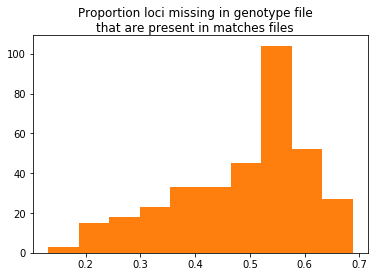

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(p_present_list)
plt.suptitle("Proportion loci missing in genotype file\nthat are present in matches files")
plt.show()

In [7]:
plt.close()

### 3) What is the average stack depth at the loci that are present in the matches files, but missing in the haplotype file?

In [8]:
# go into the .matches file for each alaska sample and find stack depth for each locus

stack_depth_list = []

for sample in sampleList: 
    individual_dict = {}
    matchfile = open("stacks_b4_wgenome/" + sample + ".matches.tsv", "r")
    matchfile.readline()
    for line in matchfile:
        newlocus = line.strip().split()[2]
        if newlocus in loci_list:
            if newlocus not in individual_dict.keys():
                individual_dict[newlocus] = [int(line.strip().split()[6])]
            elif newlocus in individual_dict.keys():
                depths = individual_dict[newlocus]
                depths.append(int(line.strip().split()[6]))
                individual_dict[newlocus] = depths
    matchfile.close()
    for i in individual_dict.keys():
        depths = individual_dict[i]
        total_depth = sum(depths)
        stack_depth_list.append(total_depth)

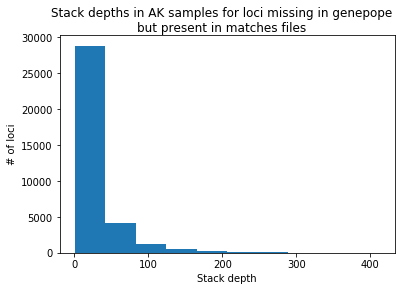

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(stack_depth_list)
plt.suptitle("Stack depths in AK samples for loci missing in genepope\nbut present in matches files")
plt.xlabel("Stack depth")
plt.ylabel("# of loci")
plt.show()

In [10]:
plt.close()

In [15]:
print "Loci with stack depth below 10:"
print len([i for i in stack_depth_list if i < 10])
print "Out of", len(stack_depth_list), "loci present in matches files that were not processed in genepop."

Loci with stack depth below 10:
11995
Out of 35117 loci present in matches files that were not processed in genepop.


<br>
### 4) What allele do the Alaskan samples have at loci that are missing, and is this allele in the catalog?


<br>
<br>
### Loss of loci at MAF filtering

I seem to be losing a lot more loci at the MAF filtering step than in the korean-only stacks runs. 